# Projet Machine Learning
LUCAS Antoine     
BESOMBES Gabriel     
mars 2019     
#    

## Introduction
---
On s'intéresse a des données sur des maladies cardiaques. Le but étant de pouvoir prédire à partir d'un certain nombre de données si une personne a une maladie cardiaque ou non.   
Nous allons étudier rapidement le jeu de données puis tester différents classifieurs issus de la library sklearn.

---
#    

## Importations
---
Nous allons utiliser différentes library :
* pandas pour ouvrir et visualiser nos données en format csv
* matplotlib pour faire des graphiques
* sklearn pour les différents classifieurs et leur vérification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

---
#     

## Importation des données
---
On ouvre le fichier _heart.csv_ qui se trouve à la racine de notre programme avec *pandas.read_csv()*   
Ce fichier est disponible ici : https://www.kaggle.com/ronitf/heart-disease-uci

In [3]:
heart = pd.read_csv("heart.csv")

On visualise rapidement le début et la fin de notre dataframe

In [4]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


---
#     

## Test rapide sur le format
---
On utilise _describe_ pour avoir un résumé rapide de nos données

In [6]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


On vérifie qu'il ne manque pas de données :
* _isnull()_ regarde si il manque une valeur
* _any(axis=1)_ renvoie une liste avec True si il manque une valeur, False sinon. Les données sont traitées par ligne    

Si il manquait des valeurs on aurait des True en sortie

In [8]:
for i in heart.isnull().any(axis=1):
    if i:
        print(i)

## Test avec les K plus proches voisins
---
On teste rapidement avec un classifieur instancié à n=3

In [51]:
knn = KNeighborsClassifier(n_neighbors=3)

###   
On a laissé les autres paramètres à leurs valeurs par défaut comme on peut le voir ici :

In [52]:
print(knn)

KNeighborsClassifier(n_neighbors=3)


###    
On regarde nos colonnes pour sortir celle qui correspond à la cible

In [11]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

###    
Ici il s'agit de la colonne target qui, comme spécifié sur kaggle, est composée de 1 et 0 suivant que la personne a eu une maladie cardiaque ou non.

In [12]:
heart["target"].head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

###    
Dans la suite on va utiliser *%%time* pour avoir une idée du temps d'exécution.

###   
On sépare notre jeu de données en deux (70/30)

In [13]:
%%time
X_train, X_test, y_train, y_test = train_test_split(heart.drop("target", axis=1),
                                                    heart["target"],
                                                    test_size=0.3)

CPU times: user 3.87 ms, sys: 0 ns, total: 3.87 ms
Wall time: 5.5 ms


###   
On entraine notre classifieur

In [14]:
%%time
knn.fit(X_train, y_train)

CPU times: user 4.17 ms, sys: 32 µs, total: 4.2 ms
Wall time: 4.77 ms


KNeighborsClassifier(n_neighbors=3)

###    
On fait une prédiction avec notre classifieur sur les données de test

In [15]:
%%time
res=knn.predict(X_test)

CPU times: user 6.8 ms, sys: 402 µs, total: 7.2 ms
Wall time: 6.19 ms


###    
On calcule l'accurary de notre classifieur

In [16]:
%%time
metrics.accuracy_score(y_test, res)

CPU times: user 1.17 ms, sys: 165 µs, total: 1.33 ms
Wall time: 891 µs


0.6043956043956044

###    
On calcule la matrice de confusion

In [17]:
cm = metrics.confusion_matrix(y_test, res)
print(cm)

[[23 19]
 [17 32]]


###    
On affiche avec pyplot

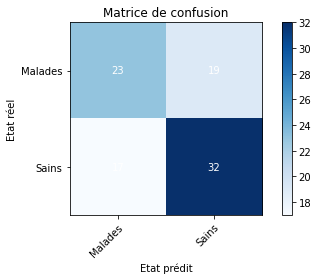

In [18]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=["Malades", "Sains"],
       yticklabels=["Malades", "Sains"],
       title="Matrice de confusion",
       ylabel='Etat réel',
       xlabel='Etat prédit')


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

On constate que les erreurs se font surtout sur les sains (faux positifs):     
Pour les sains on a:
* 26 bonnes prédictions et 14 mauvaises, soit un taux d'erreur de 14/40\*100=35%

Pour les malades on a:
* 47 bonnes prédictions et 4 mauvaises, soit un taux d'erreur de 4/51=\*100=8%

Ce type d'erreur est moins grave puisque ce serait vérifié par la suite par un médecin (Il vaut mieux en vérifier trop que pas assez)

###   
On peut maintenant répéter l'opération plusieurs fois avec différentes valeurs de n pour voir quel n correspond le mieux

In [19]:
l = []
knns = []
data = heart.drop("target", axis=1)
target = heart["target"]
for n in range(1,51):
    l.append([])
    knns.append([])
    for i in range(0,100):
        knn = KNeighborsClassifier(n_neighbors=n)
        X_train, X_test, y_train, y_test = train_test_split(data,
                                                    target,
                                                    test_size=0.3)
        knn.fit(X_train, y_train)
        knns[-1].append([knn, y_test, knn.predict(X_test)])
        l[-1].append(metrics.accuracy_score(y_test, knn.predict(X_test)))

In [20]:
l2 = [sum(X)/len(X) for X in l]

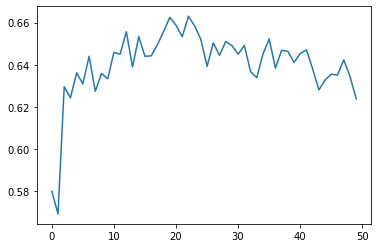

In [21]:
plt.plot(l2)

###    
On regarde pour quelle valeur de n on a la moyenne d'accuracy la plus haute.

In [22]:
print(max(l2))
print(l2.index(max(l2)))

0.6629670329670329
22


Il s'agit donc de n=19

###   
Puis on regarde quel classifieur a la meilleure accuracy

In [23]:
print(max(max(l)))
print(max(l).index(max(max(l))))

0.7582417582417582
0


Ici c'est n=1

In [24]:
print(l[0].index(max(l[0])))

5


###   
On récupère ce classifieur puis on refait la matrice de confusion

In [25]:
knn, y_test, res = knns[0][8]

In [26]:
cm = metrics.confusion_matrix(y_test, res)
print(cm)

[[21 23]
 [15 32]]


###    
On affiche avec pyplot

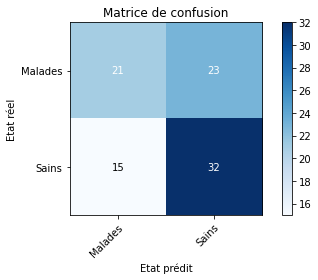

In [27]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=["Malades", "Sains"],
       yticklabels=["Malades", "Sains"],
       title="Matrice de confusion",
       ylabel='Etat réel',
       xlabel='Etat prédit')


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

On a le même type d'erreur mais en plus petites quantités ce qui correspond bien avec l'accuracy plus élevée.

---
#    

## Réflexion intermédiaire
---
La technique des voisins les plus proches n'est pas forcément la meilleure technique pour ce genre de jeux de données avec beaucoup de colonnes.    
Nous allons donc tester d'autres classifieurs.

---
#     

## Test avec régression
---
On teste rapidement avec une régression

In [28]:
logreg = LogisticRegression(random_state=0,
                            solver='lbfgs',
                            multi_class='multinomial',
                            max_iter=5000)

###   
On a laissé les paramètres à leurs valeurs par défaut comme on peut le voir ici :

In [29]:
print(logreg)

LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=0)


###   
On sépare notre jeu de données en deux (70/30)

In [30]:
%%time
X_train, X_test, y_train, y_test = train_test_split(heart.drop("target", axis=1),
                                                    heart["target"],
                                                    test_size=0.3)

CPU times: user 3.26 ms, sys: 0 ns, total: 3.26 ms
Wall time: 2.83 ms


###   
On entraine notre classifieur

In [31]:
%%time
logreg.fit(X_train, y_train)

CPU times: user 71.6 ms, sys: 32 µs, total: 71.7 ms
Wall time: 73.6 ms


LogisticRegression(max_iter=5000, multi_class='multinomial', random_state=0)

###    
On fait une prédiction avec notre classifieur sur les données de test

In [32]:
%%time
res=logreg.predict(X_test)

CPU times: user 2.14 ms, sys: 8 µs, total: 2.15 ms
Wall time: 2.02 ms


###    
On calcule l'accurary de notre classifieur

In [33]:
%%time
metrics.accuracy_score(y_test, res)

CPU times: user 795 µs, sys: 0 ns, total: 795 µs
Wall time: 587 µs


0.7692307692307693

###   
On peut maintenant répéter l'opération plusieurs fois pour voir si on peut avoir un meilleur modèle

In [34]:
l = []
logregs = []
data = heart.drop("target", axis=1)
target = heart["target"]
for i in range(0,100):
    logreg = LogisticRegression(random_state=0,
                        solver='lbfgs',
                        multi_class='multinomial',
                        max_iter=5000)
    X_train, X_test, y_train, y_test = train_test_split(data,
                                                target,
                                                test_size=0.3)
    logreg.fit(X_train, y_train)
    logregs.append([logreg, y_test, logreg.predict(X_test)])
    l.append(metrics.accuracy_score(y_test, logreg.predict(X_test)))

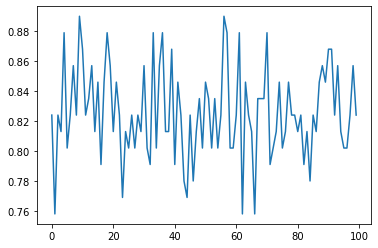

In [35]:
plt.plot(l)

In [36]:
sum(l)/len(l)

0.8259340659340658

On voit que sur les 100 modèles, certains ont une accuracy très haute et que la moyenne est de 82%. Ce classifieur a l'air de mieux marcher que le précédent

###   
Puis on regarde quel classifieur a la meilleure accuracy

In [37]:
print(max(l))
print(l.index(max(l)))

0.8901098901098901
9


###   
On récupère ce classifieur puis on refait la matrice de confusion

In [38]:
logreg, y_test, res = logregs[84]

In [39]:
cm = metrics.confusion_matrix(y_test, res)
print(cm)

[[33 12]
 [ 8 38]]


###    
On affiche avec pyplot

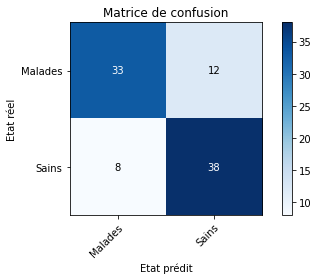

In [40]:
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)

ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=["Malades", "Sains"],
       yticklabels=["Malades", "Sains"],
       title="Matrice de confusion",
       ylabel='Etat réel',
       xlabel='Etat prédit')


plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()

On a encore moins d'erreur et plus de faux positifs que de faux négatifs

---
#    

## Naive Bayes
---

In [41]:
GNB = GaussianNB()

In [42]:
%%time
X_train, X_test, y_train, y_test = train_test_split(heart.drop("target", axis=1),
                                                    heart["target"],
                                                    test_size=0.3)

CPU times: user 2.73 ms, sys: 0 ns, total: 2.73 ms
Wall time: 2.49 ms


###   
On entraine notre classifieur

In [43]:
%%time
GNB.fit(X_train, y_train)

CPU times: user 4.2 ms, sys: 1 µs, total: 4.2 ms
Wall time: 3.39 ms


GaussianNB()

###    
On fait une prédiction avec notre classifieur sur les données de test

In [44]:
%%time
res=GNB.predict(X_test)

CPU times: user 2.4 ms, sys: 0 ns, total: 2.4 ms
Wall time: 2.12 ms


###    
On calcule l'accurary de notre classifieur

In [45]:
%%time
metrics.accuracy_score(y_test, res)

CPU times: user 606 µs, sys: 0 ns, total: 606 µs
Wall time: 448 µs


0.8571428571428571

L'accuracy semble plus faible mais le temps d'exécution est court

---
#    

## Vector classification
---

In [46]:
svc = SVC(kernel="linear")

In [47]:
%%time
X_train, X_test, y_train, y_test = train_test_split(heart.drop("target", axis=1),
                                                    heart["target"],
                                                    test_size=0.3)

CPU times: user 3.25 ms, sys: 0 ns, total: 3.25 ms
Wall time: 2.88 ms


###   
On entraine notre classifieur

In [48]:
%%time
svc.fit(X_train, y_train)

CPU times: user 635 ms, sys: 0 ns, total: 635 ms
Wall time: 634 ms


SVC(kernel='linear')

###    
On fait une prédiction avec notre classifieur sur les données de test

In [49]:
%%time
res=svc.predict(X_test)

CPU times: user 2.93 ms, sys: 0 ns, total: 2.93 ms
Wall time: 2.26 ms


###    
On calcule l'accurary de notre classifieur

In [50]:
%%time
metrics.accuracy_score(y_test, res)

CPU times: user 1.29 ms, sys: 9 µs, total: 1.3 ms
Wall time: 939 µs


0.8901098901098901

On a de nouveau une accuracy élevée mais un temps d'exécution plus long

---
#    

## Conclusion
---
On constate que les modèles qui demandent le plus de ressources sont aussi plus précis dans notre cas. Mais aussi que différents classifieurs sont adaptés à différents types de jeux de données. Avec plus de données il faudrait donc trouver un compromis entre vitesse d'exécution et performance.   
Dans notre cas des classifieurs plus simples et linéaires ont donnés de meilleurs résultats.

---
#    

In [ ]:
bash: user: Aucun fichier ou dossier de ce type
